In [1]:
import os
import scipy.stats as s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gw.core import utm

In [2]:
def rTheta (x, y, x0=0, y0=0):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    theta = np.arctan2(-(y-y0), -(x-x0)) # from the other turbs to the ref turb
    return r, np.rad2deg(theta)

def rotate(x, y, theta, x0=0, y0=0):
    ctheta = np.cos(theta)
    stheta = np.sin(theta)
    xNew = (x-x0)*ctheta - (y-y0)*stheta
    yNew = (x-x0)*stheta + (y-y0)*ctheta
    return xNew, yNew

def polar2sector(polarAngle):
    for i in range(len(polarAngle)):
        if polarAngle[i] <= -90 and polarAngle[i] >= -180.0:
            polarAngle[i] = polarAngle[i] + 360.0
     
    sector = 270.0 - polarAngle
    return sector

In [3]:
D = 110.0
dat = pd.read_excel('layout.xlsx',sheet_name = 'layout',
                        skiprows=1 , sep='\s+')
print (dat)

  Name        Long        Lat
0  A47  120.096438  34.361754
1  A48  120.097015  34.358799
2  A49  120.095821  34.355970
3  A50  120.094077  34.353105


In [4]:
converted = utm.UTMConv.utm_global_arr(utm.UTMConv(), dat['Long'], dat['Lat'])
pt, zone = list(zip(*converted))
zone = [(str(zone[i]).split('(')[1]).split(')')[0] for i in range(len(zone))]
#print(zone)
x,y = list(zip(*pt))
dat['x'] = list(x)
dat['y'] = list(y)
dat['zone'] = list(zone)
print(dat)
#dat.to_csv('TurbinesLayout.csv')

  Name        Long        Lat              x             y zone
0  A47  120.096438  34.361754  232962.546255  3.806089e+06  51S
1  A48  120.097015  34.358799  233006.205732  3.805759e+06  51S
2  A49  120.095821  34.355970  232887.394774  3.805449e+06  51S
3  A50  120.094077  34.353105  232717.879728  3.805135e+06  51S


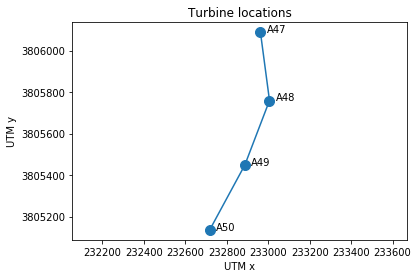

In [5]:
plt.plot(dat['x'], dat['y'], marker = 'o', markersize=10 )
plt.axis('equal')
plt.xlabel('UTM x')  
plt.ylabel('UTM y')
plt.title('Turbine locations')
for i in range(len(dat)):
    plt.text(dat['x'][i]+30, dat['y'][i], dat['Name'][i])
plt.show()

In [6]:
refTurbIndex = 0
refTurb = [dat['x'][refTurbIndex],dat['y'][refTurbIndex]]
print('Ref Turb (', dat['Name'][refTurbIndex] , '),  Location: ', refTurb)

# Original Coordinates
dist, theta = rTheta(dat['x'], dat['y'], refTurb[0], refTurb[1])
sector = polar2sector(theta)

Ref Turb ( A47 ),  Location:  [232962.5462551202, 3806088.6535553536]


In [7]:
dat['x'] -= refTurb[0]
dat['y'] -= refTurb[1]
turbLoc = pd.DataFrame(
          {'x':dat['x'],
           'y':dat['y'],
           'dist': dist,
           'dist_D':dist/D,
           'theta': theta,
           'sector': sector
          })
print('Turb Locs w.r.t. Ref Turb:\n', turbLoc)

Turb Locs w.r.t. Ref Turb:
             x           y        dist    dist_D       theta      sector
0    0.000000    0.000000    0.000000  0.000000  180.000000   90.000000
1   43.659477 -329.293924  332.175614  3.019778   97.552519  172.447481
2  -75.151481 -640.025377  644.422399  5.858385   83.303022  186.696978
3 -244.666527 -953.280605  984.177637  8.947069   75.605319  194.394681


In [8]:
# Layout for DES
rotAngle = -np.deg2rad(theta[1]) #turbLoc['theta'][1]
print(rotAngle)

# After rotation
xNew, yNew = rotate(dat['x'],dat['y'], rotAngle) # x, y already wrt ref turb
distNew, thetaNew = rTheta(xNew, yNew) # Already wrt ref turb
sectorNew = polar2sector(thetaNew)

-1.7026126494333877


In [9]:
turbLoc = pd.DataFrame(
          {'x':xNew,
           'y':yNew,
           'dist': distNew,
           'dist_D':distNew/D,
           'theta': thetaNew,
           'sector': sectorNew
          })
print('Turb Locs w.r.t. Ref Turb after rotation:\n', turbLoc)

Turb Locs w.r.t. Ref Turb after rotation:
             x             y        dist    dist_D         theta      sector
0    0.000000 -0.000000e+00    0.000000  0.000000  1.800000e+02   90.000000
1 -332.175614 -3.552714e-14  332.175614  3.019778  6.127948e-15  270.000000
2 -624.595500  1.586212e+02  644.422399  5.858385 -1.424950e+01  284.249497
3 -912.852979  3.678384e+02  984.177637  8.947069 -2.194720e+01  291.947200


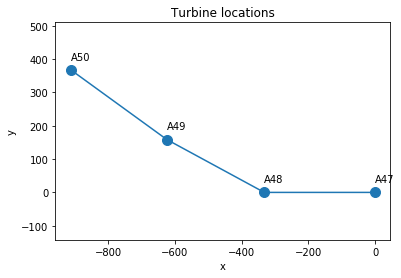

In [10]:
# Layout for DES
plt.plot(xNew, yNew, marker = 'o', markersize=10 )
plt.axis('equal')
plt.xlabel('x')  
plt.ylabel('y')
for i in range(len(dat)):
    plt.text(xNew[i], yNew[i] +30, dat['Name'][i])
plt.title('Turbine locations')
plt.show()

In [11]:
# Layout for DES
bbox = [np.amin(xNew)-10*D, np.amin(yNew)-5*D, np.amax(xNew)+15*D, np.amax(yNew)+5*D] 
print('bbox: ',bbox)

bbox:  [-2012.8529790678558, -550.0, 1650.0, 917.8383605346334]


In [16]:
# Layout for LES
rotAngle = -np.deg2rad(225.0 - sector[1]) #turbLoc['theta'][1]
print(rotAngle)

# After rotation
xNew, yNew = rotate(dat['x'],dat['y'], rotAngle) # x, y already wrt ref turb
distNew, thetaNew = rTheta(xNew, yNew) # Already wrt ref turb
sectorNew = polar2sector(thetaNew)

-0.9172144860359396


In [17]:
turbLoc = pd.DataFrame(
          {'x':xNew,
           'y':yNew,
           'dist': distNew,
           'dist_D':distNew/D,
           'theta': thetaNew,
           'sector': sectorNew
          })
print('Turb Locs w.r.t. Ref Turb after rotation:\n', turbLoc)

Turb Locs w.r.t. Ref Turb after rotation:
             x           y        dist    dist_D       theta      sector
0    0.000000    0.000000    0.000000  0.000000  180.000000   90.000000
1 -234.883629 -234.883629  332.175614  3.019778   45.000000  225.000000
2 -553.817849 -329.493577  644.422399  5.858385   30.750503  239.249497
3 -905.585531 -385.383533  984.177637  8.947069   23.052800  246.947200


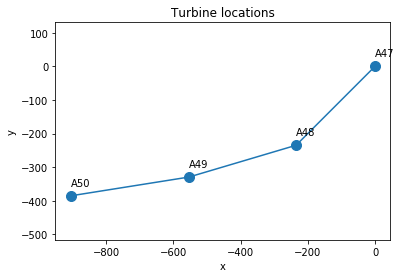

In [18]:
# Layout for LES
plt.plot(xNew, yNew, marker = 'o', markersize=10 )
plt.axis('equal')
plt.xlabel('x')  
plt.ylabel('y')
for i in range(len(dat)):
    plt.text(xNew[i], yNew[i] +30, dat['Name'][i])
plt.title('Turbine locations')
plt.show()

In [27]:
# Layout for LES
bbox = np.array([np.amin(xNew)-10*D, np.amin(yNew)-10*D, np.amax(xNew)+15*D, np.amax(yNew)+10*D]).astype(int)
print('bbox: ',bbox)

bbox:  [-2005 -1485  1650  1100]


In [28]:
dGrid = 10 # m
Nx = int((bbox[2]-bbox[0])/dGrid)
Ny = int((bbox[3]-bbox[1])/dGrid)
print('Nx = %d, Ny= %d'%(Nx, Ny))

Nx = 365, Ny= 258
